In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

In [6]:
data.shape

(122, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


This dataset is divided into two regions
1) The Bejaia region 
2) Sidi-Bel Abel Region dataset

Add new column to the dataset

In [8]:
data.loc[:64,'Region']=0
data.loc[64:, 'Region']=1

In [9]:
df = data

In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0.0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0.0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0.0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire,0.0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0.0


In [14]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
43,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,0.0


In [15]:
df['Region'] = df['Region'].astype(int)

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [17]:
#removing Null values
df = df.dropna().reset_index(drop=True)

In [18]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [19]:
df.shape

(121, 15)

In [21]:
df.iloc[[64]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
64,5,8,2012,34,42,17,0.1,88.3,23.6,52.5,19.0,23.5,12.6,fire,1


In [22]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [23]:
df.columns = df.columns.str.strip()

In [24]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [25]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

######  Changing the object types to floats

In [26]:
objects = [features for features in df.columns if df[features].dtypes=='o']


In [28]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int32  
 1   month        121 non-null    int32  
 2   year         121 non-null    int32  
 3   Temperature  121 non-null    int32  
 4   RH           121 non-null    int32  
 5   Ws           121 non-null    int32  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    object 
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    object 
 13  Classes      121 non-null    object 
 14  Region       121 non-null    int32  
dtypes: float64(5), int32(7), object(3)
memory usage: 11.0+ KB


In [30]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Region
count,121.000000,121.000000,121.0,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,15.768595,7.504132,2012.0,33.132231,56.057851,14.983471,0.682645,81.038017,17.066116,5.838017,17.965289,0.479339
std,8.878589,1.118958,0.0,3.674103,15.686139,2.689434,1.492296,12.274182,13.043604,4.815068,13.919595,0.501650
min,1.000000,6.000000,2012.0,24.000000,21.000000,6.000000,0.000000,37.900000,0.900000,0.100000,1.400000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,44.000000,14.000000,0.000000,77.500000,7.200000,1.800000,7.300000,0.000000
50%,16.000000,8.000000,2012.0,34.000000,56.000000,15.000000,0.000000,84.700000,13.300000,4.500000,14.100000,0.000000
75%,23.000000,8.000000,2012.0,36.000000,67.000000,16.000000,0.500000,89.300000,23.000000,8.400000,23.900000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,8.700000,96.000000,65.900000,19.000000,68.000000,1.000000


In [31]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0


In [32]:
#save the file
df.to_csv('Cleaned_Agerian_Forest_Fires.csv', index=False)

###### Exploratory data anlysis

In [33]:
df_copy = df.drop(['day','month','year'], axis = 1)

In [34]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0


In [35]:
df_copy.Classes.value_counts()

Classes
fire             78
not fire         41
not fire          1
not fire          1
Name: count, dtype: int64

In [36]:
#Encoding of the Classes column
df_copy['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [37]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,0,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0,0


In [38]:
df_copy.Classes.value_counts()

Classes
1    78
0    43
Name: count, dtype: int64

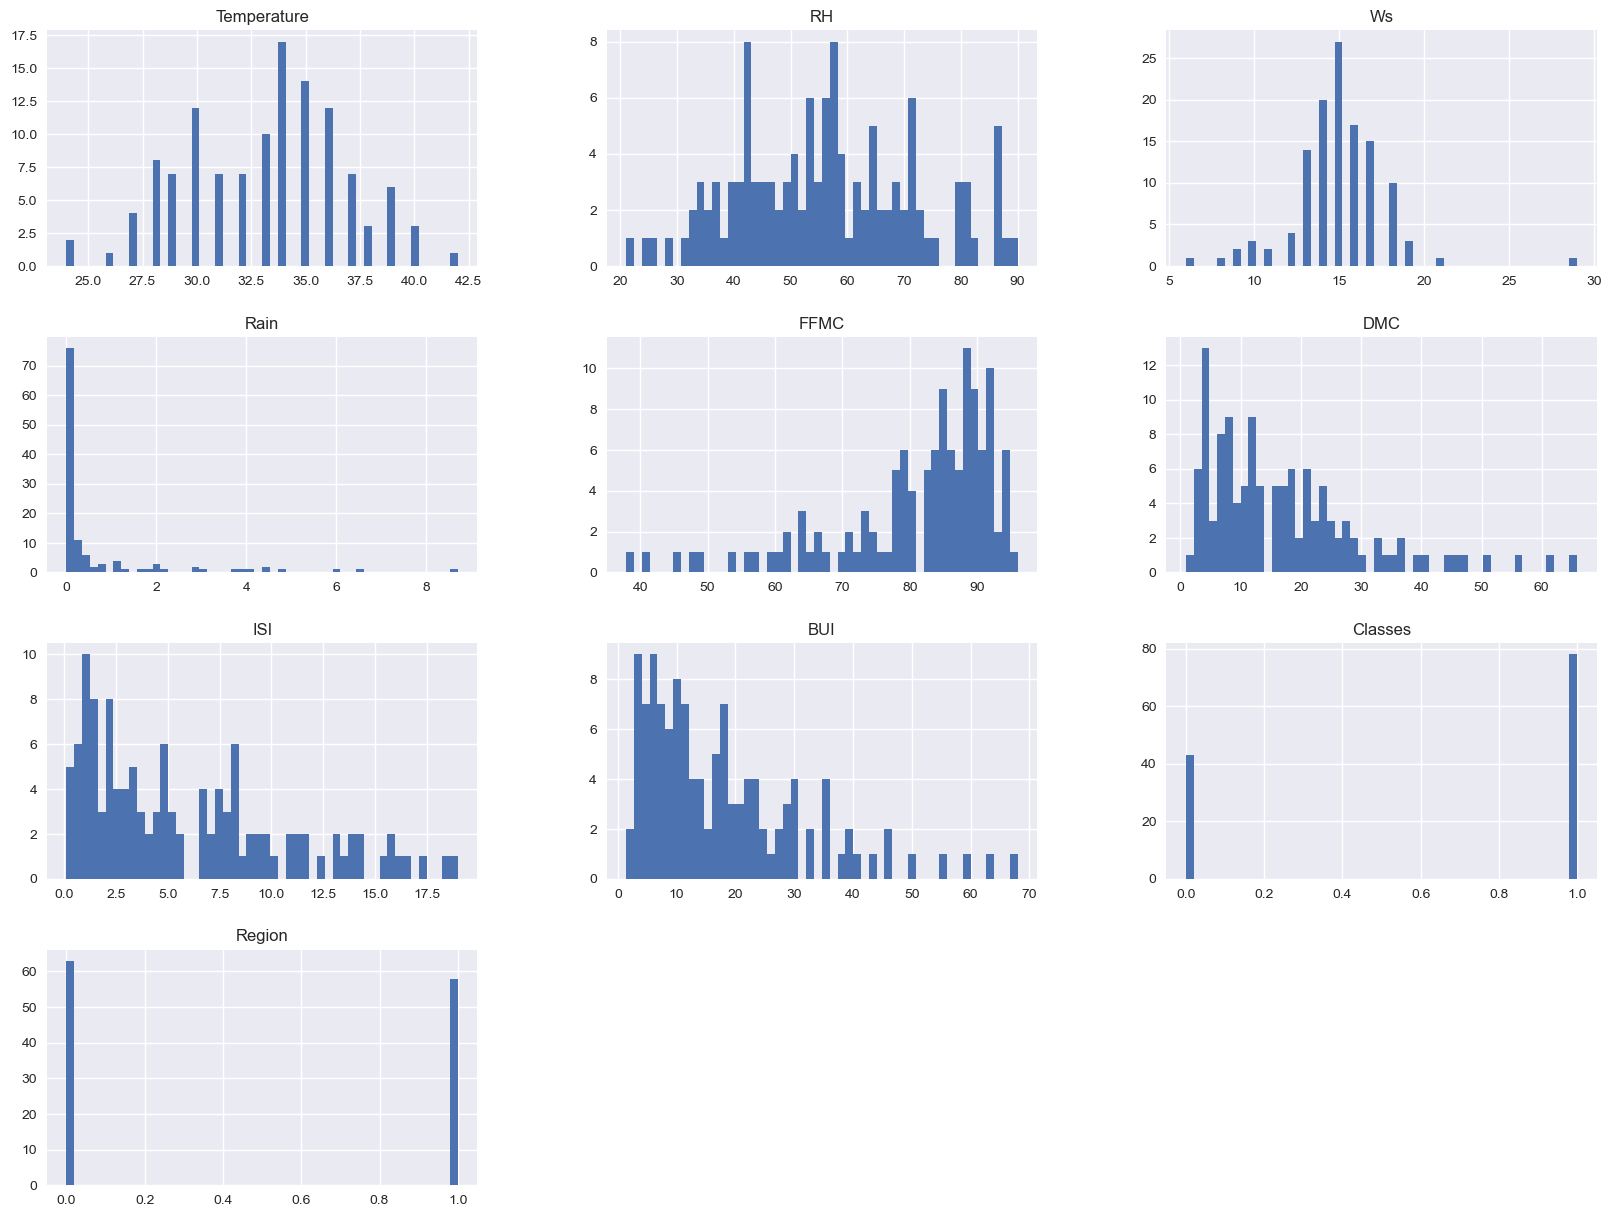

In [39]:
#plot Density plot for all features
plt.style.use('seaborn')
df_copy.hist(bins = 50, figsize = (20,15))
plt.show()

In [40]:
#percentage of classes

percentage = df_copy['Classes'].value_counts(normalize=True)*100

In [42]:
percentage

Classes
1    64.46281
0    35.53719
Name: proportion, dtype: float64

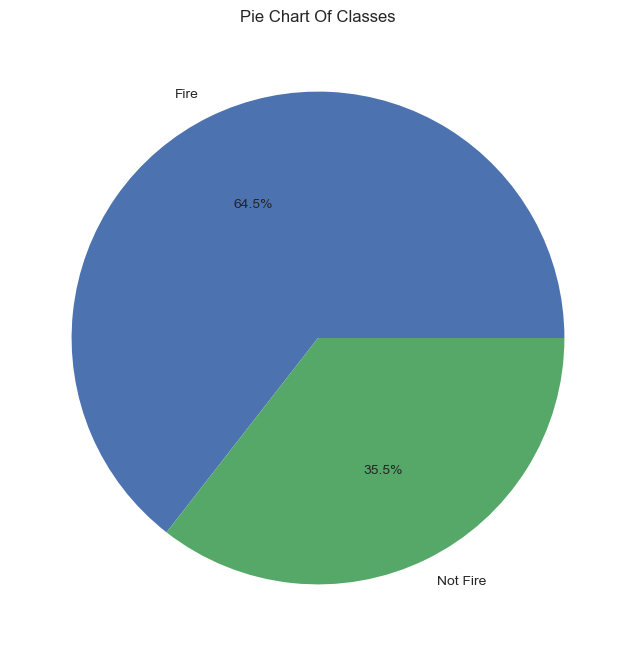

In [43]:
#plotting pie chart
classlabels = ['Fire', 'Not Fire']
plt.figure(figsize=(15,8))
plt.pie(percentage, labels=classlabels, autopct='%1.1f%%')
plt.title('Pie Chart Of Classes')
plt.show()

###### Correlation

In [44]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.594127,-0.270491,-0.127553,0.571143,0.394472,0.292707,0.535954,0.373088,0.500971,0.498754,-0.039197
RH,-0.594127,1.000000,0.154297,0.146750,-0.644134,-0.384730,-0.275144,-0.691191,-0.367170,-0.605856,-0.440500,-0.063917
Ws,-0.270491,0.154297,1.000000,-0.137527,-0.025478,0.031887,0.023962,0.128558,0.033553,0.106128,0.046994,-0.129966
Rain,-0.127553,0.146750,-0.137527,1.000000,-0.509872,-0.349583,-0.347646,-0.412636,-0.359493,-0.410213,-0.474590,-0.131281
FFMC,0.571143,-0.644134,-0.025478,-0.509872,1.000000,0.584221,0.486333,0.752513,0.580449,0.719593,0.795500,0.090265
DMC,0.394472,-0.384730,0.031887,-0.349583,0.584221,1.000000,0.882487,0.631017,0.987926,0.852193,0.537094,0.248046
DC,0.292707,-0.275144,0.023962,-0.347646,0.486333,0.882487,1.000000,0.474039,0.927774,0.716965,0.464827,0.423673
ISI,0.535954,-0.691191,0.128558,-0.412636,0.752513,0.631017,0.474039,1.000000,0.612286,0.916427,0.696190,0.156612
BUI,0.373088,-0.367170,0.033553,-0.359493,0.580449,0.987926,0.927774,0.612286,1.000000,0.844715,0.548840,0.301592
FWI,0.500971,-0.605856,0.106128,-0.410213,0.719593,0.852193,0.716965,0.916427,0.844715,1.000000,0.684079,0.224514


<Axes: >

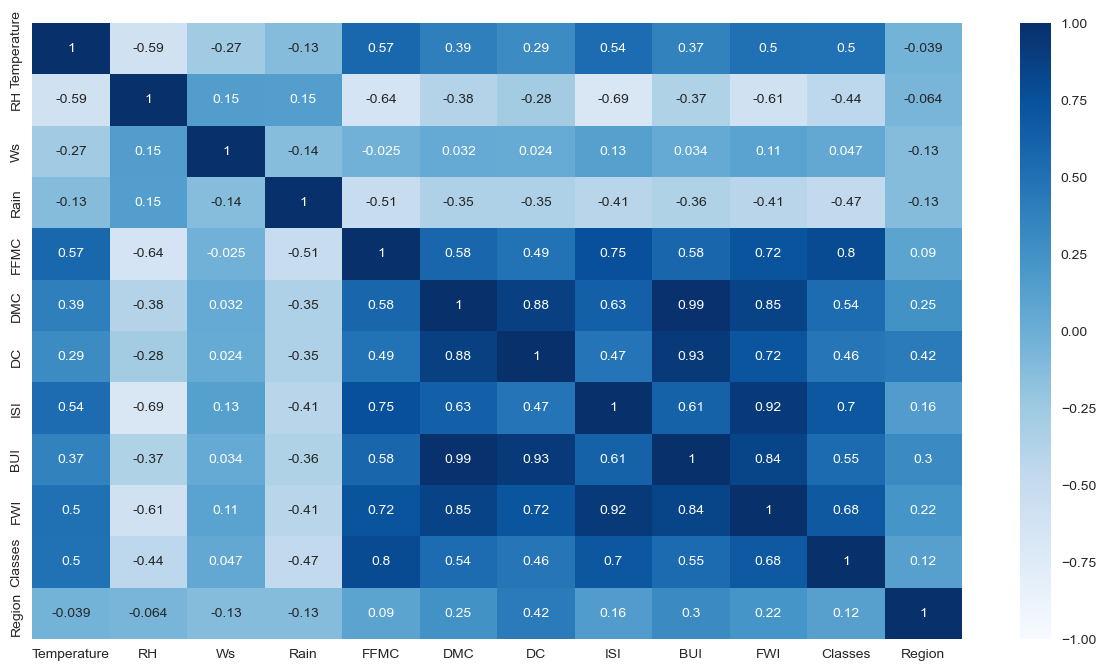

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(df_copy.corr(), annot = True, vmin=-1, vmax=1, cmap='Blues')

<Axes: >

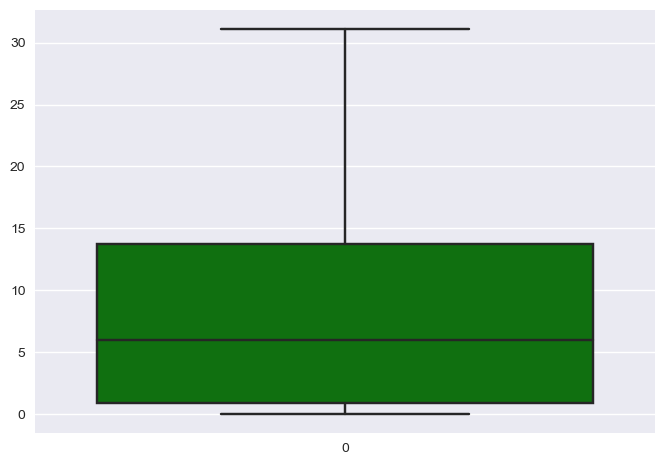

In [48]:
#using boxplot
sns.boxplot(df['FWI'], color = 'green')

In [49]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0


In [50]:
#Encoding of the Classes column
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Abel Region')

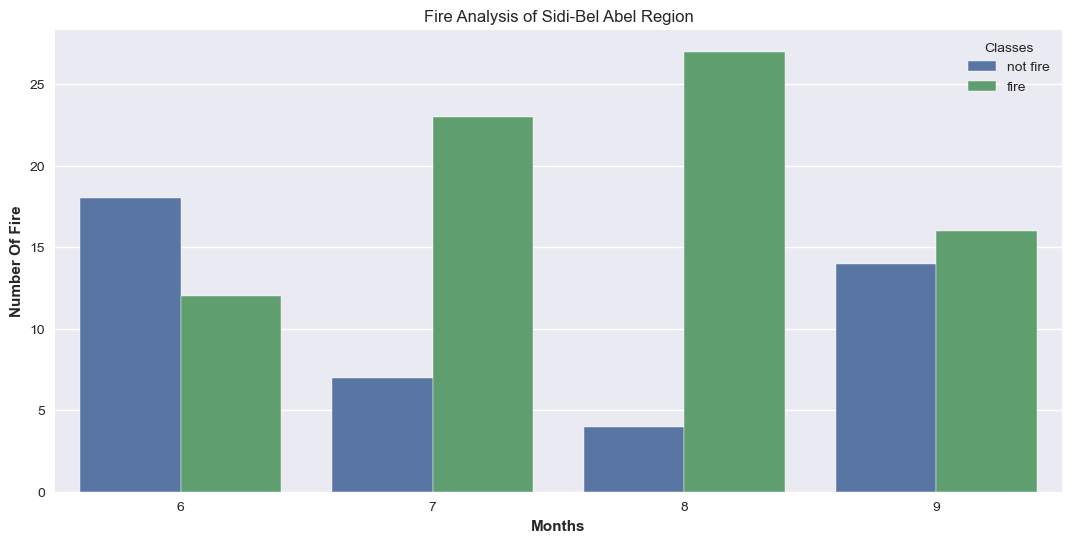

In [51]:
#monthly fire Analysis

dftemp = df.loc[df['Region']==1]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number Of Fire', weight = 'bold')
plt.xlabel('Months', weight = 'bold')
plt.title("Fire Analysis of Sidi-Bel Abel Region")

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

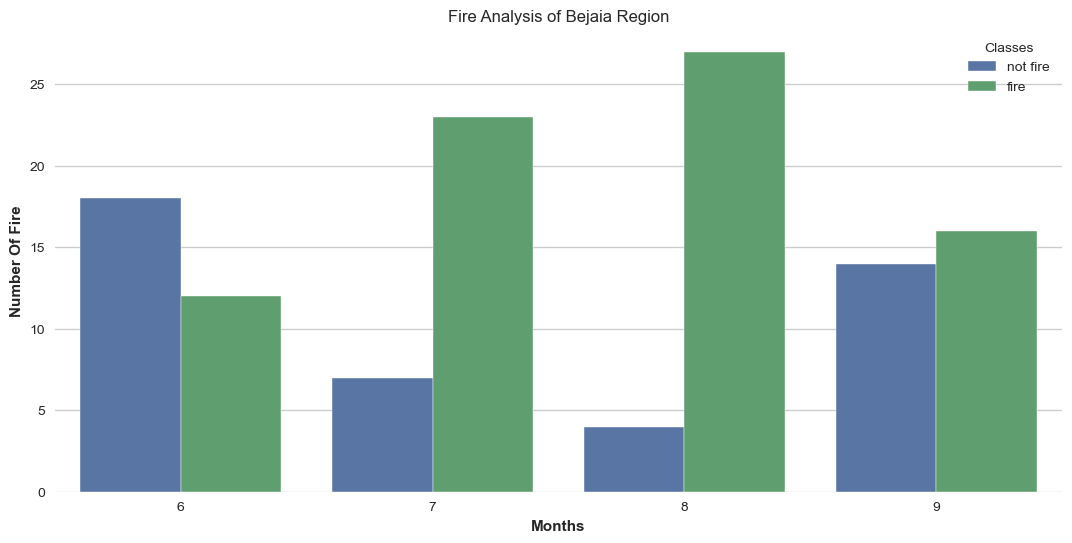

In [52]:
#monthly fire Analysis

dftemp = df.loc[df['Region']==0]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number Of Fire', weight = 'bold')
plt.xlabel('Months', weight = 'bold')
plt.title("Fire Analysis of Bejaia Region")